In [45]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [46]:
train_dir = './data/'

In [47]:
Name=[]
for file in os.listdir(train_dir):
    Name+=[file]
print(Name)
print(len(Name))

['0', '1', '3', '2']
4


In [48]:
N=[]
for i in range(len(Name)):
    N+=[i]
    
mapping=dict(zip(Name,N)) 
reverse_mapping=dict(zip(N,Name)) 

def mapper(value):
    return reverse_mapping[value]

In [49]:
dataset=[]
testset=[]
count=0
for file in Name:
    t=0
    path=os.path.join(train_dir,file)
    for im in tqdm(os.listdir(path)):
        image=load_img(os.path.join(path,im), color_mode='rgb', target_size=(40,40))
        image=img_to_array(image)
        image=image/255.0
        if t<800:
            dataset+=[[image,count]]
        else:
            testset+=[[image,count]]
        t+=1     
    count+=1
print(type(image))

100%|██████████| 1000/1000 [00:01<00:00, 684.21it/s]

<class 'numpy.ndarray'>


In [50]:
data,labels0=zip(*dataset)
test,testlabels0=zip(*testset)

In [51]:
labels1=to_categorical(labels0)
labels=np.array(labels1)

In [52]:
data=np.array(data)
test=np.array(test)

In [53]:
trainx,testx,trainy,testy=train_test_split(data,labels,test_size=0.2,random_state=44)

In [54]:
print(trainx.shape)
print(testx.shape)
print(trainy.shape)
print(testy.shape)

(2560, 40, 40, 3)
(640, 40, 40, 3)
(2560, 4)
(640, 4)


In [55]:
datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,rotation_range=20,zoom_range=0.2,
                        width_shift_range=0.2,height_shift_range=0.2,shear_range=0.1,fill_mode="nearest")

In [56]:
pretrained_model3 = tf.keras.applications.DenseNet201(input_shape=(40,40,3),include_top=False,weights='imagenet',pooling='avg')
pretrained_model3.trainable = False
inputs3 = pretrained_model3.input
x3 = tf.keras.layers.Dense(128, activation='relu')(pretrained_model3.output)
outputs3 = tf.keras.layers.Dense(4, activation='softmax')(x3)
model = tf.keras.Model(inputs=inputs3, outputs=outputs3)

In [57]:
inputs3 = pretrained_model3.input
x3 = tf.keras.layers.Dense(128, activation='relu')(pretrained_model3.output)
outputs3 = tf.keras.layers.Dense(4, activation='softmax')(x3)
model = tf.keras.Model(inputs=inputs3, outputs=outputs3)

In [58]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [59]:
checkpoint_path = "training_1/cp.weights.h5"
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)
his=model.fit(datagen.flow(trainx,trainy,batch_size=32),validation_data=(testx,testy),epochs=15, callbacks=cp_callback)

Epoch 1/15


/home/sidd/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.6319 - loss: 0.8565
Epoch 1: saving model to training_1/cp.weights.h5
80/80 ━━━━━━━━━━━━━━━━━━━━ 28s 152ms/step - accuracy: 0.6334 - loss: 0.8532 - val_accuracy: 0.9234 - val_loss: 0.2257
Epoch 2/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.8671 - loss: 0.3521
Epoch 2: saving model to training_1/cp.weights.h5
80/80 ━━━━━━━━━━━━━━━━━━━━ 11s 136ms/step - accuracy: 0.8671 - loss: 0.3518 - val_accuracy: 0.9703 - val_loss: 0.1354
Epoch 3/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.8858 - loss: 0.2692
Epoch 3: saving model to training_1/cp.weights.h5
80/80 ━━━━━━━━━━━━━━━━━━━━ 14s 165ms/step - accuracy: 0.8859 - loss: 0.2690 - val_accuracy: 0.9891 - val_loss: 0.0791
Epoch 4/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.9135 - loss: 0.2311
Epoch 4: saving model to training_1/cp.weights.h5
80/80 ━━━━━━━━━━━━━━━━━━━━ 9s 117ms/step - accuracy: 0.9135 - loss: 0.2309 - val_accuracy: 0.9609 - val_loss: 0.1276

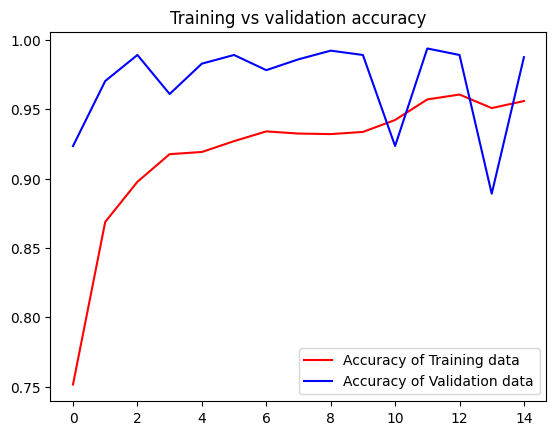

<Figure size 640x480 with 0 Axes>

In [60]:
get_acc = his.history['accuracy']
value_acc = his.history['val_accuracy']
get_loss = his.history['loss']
validation_loss = his.history['val_loss']

epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

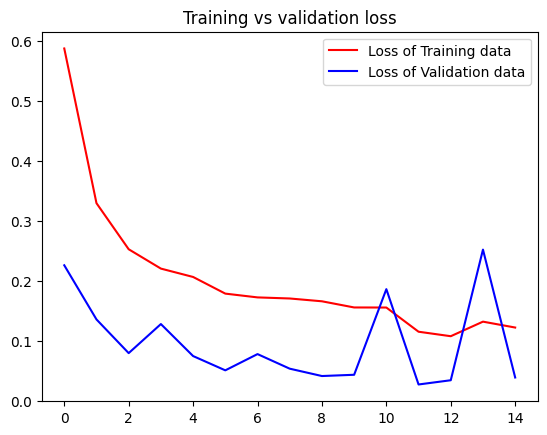

<Figure size 640x480 with 0 Axes>

In [61]:
epochs = range(len(get_loss))
plt.plot(epochs, get_loss, 'r', label='Loss of Training data')
plt.plot(epochs, validation_loss, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

In [62]:
from tensorflow import keras
print(tf.version.VERSION)

2.16.1


In [63]:
os.listdir(checkpoint_dir)

['cp.weights.h5']

In [64]:
pretrained_model3 = tf.keras.applications.DenseNet201(input_shape=(40,40,3),include_top=False,weights='imagenet',pooling='avg')
pretrained_model3.trainable = False
inputs3 = pretrained_model3.input
x3 = tf.keras.layers.Dense(128, activation='relu')(pretrained_model3.output)
outputs3 = tf.keras.layers.Dense(4, activation='softmax')(x3)
model1 = tf.keras.Model(inputs=inputs3, outputs=outputs3)

In [65]:
checkpoint_path = "training_1/cp.weights.h5"
model1.load_weights(checkpoint_path)

In [66]:
y_pred=model1.predict(testx)
pred=np.argmax(y_pred,axis=1)
ground = np.argmax(testy,axis=1)
print(classification_report(ground,pred))

20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 69ms/step
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       154
           1       1.00      0.97      0.98       166
           2       0.98      1.00      0.99       168
           3       1.00      0.98      0.99       152

    accuracy                           0.99       640
   macro avg       0.99      0.99      0.99       640
weighted avg       0.99      0.99      0.99       640

